In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

dataset=pd.read_csv("dataset.csv") # Print out a quick overview of the data
dataset.head()
dataset.drop('URL', axis=1, inplace=True) # Drop the URL column since that is a unique column for training
print(dataset.isnull().sum())
dataset[pd.isnull(dataset).any(axis=1)]
dataset.describe(include='all') # Quick statistical summary of data
dataset = dataset.interpolate()  # Interpolate our data to get rid of null values
print(dataset.isnull().sum())

# Quick statistical summary of data
dataset['SERVER'].fillna('RARE_VALUE', inplace=True)
dataset_svm = pd.get_dummies(dataset,prefix_sep='--')
print(dataset_svm.head())
X = dataset_svm.drop('Type',axis=1) #Separate predictors and response Predictors
y = dataset_svm['Type']
X.head()

# Our split will be a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Get a training and test dataset
svm = svm.SVC(kernel='rbf', random_state=0, gamma=3, C=1.0)

#Model Building, using SVM
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_P

Test results:

Accuracy Score: 0.8599

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       306
           1       1.00      0.02      0.04        51

   micro avg       0.86      0.86      0.86       357
   macro avg       0.93      0.51      0.48       357
weighted avg       0.88      0.86      0.80       357


Confusion Matrix:
[[306   0]
 [ 50   1]]



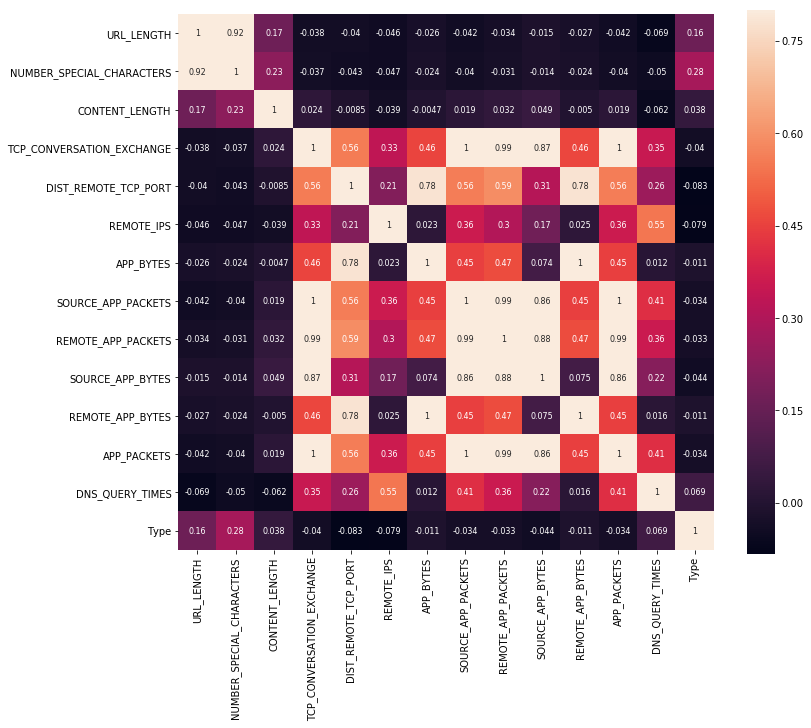

In [2]:
corrmat = dataset.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

# Visualize our results
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

print_score(svm,X_train,y_train,X_test,y_test,train=False)

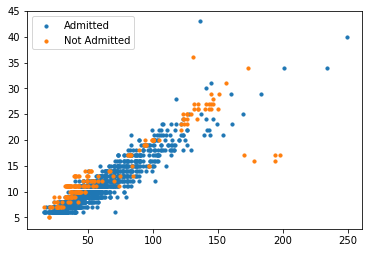

In [3]:
# use of matplotlib

X_test = dataset.iloc[:, :-1]# X = feature values, all the columns except the last column
y_test = dataset.iloc[:, -1] # y = target values, last column of the data frame

admitted = dataset.loc[y_test == 0] # filter out the applicants that got admitted
not_admitted = dataset.loc[y_test == 1] # filter out the applicants that din't get admission

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()